In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
%matplotlib inline
import seaborn as sns

loading the dataset

In [2]:
df=pd.read_csv('penguins_size.csv')
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [3]:
df.dtypes

species               object
island                object
culmen_length_mm     float64
culmen_depth_mm      float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

univariate analysis

<function matplotlib.pyplot.show(close=None, block=None)>

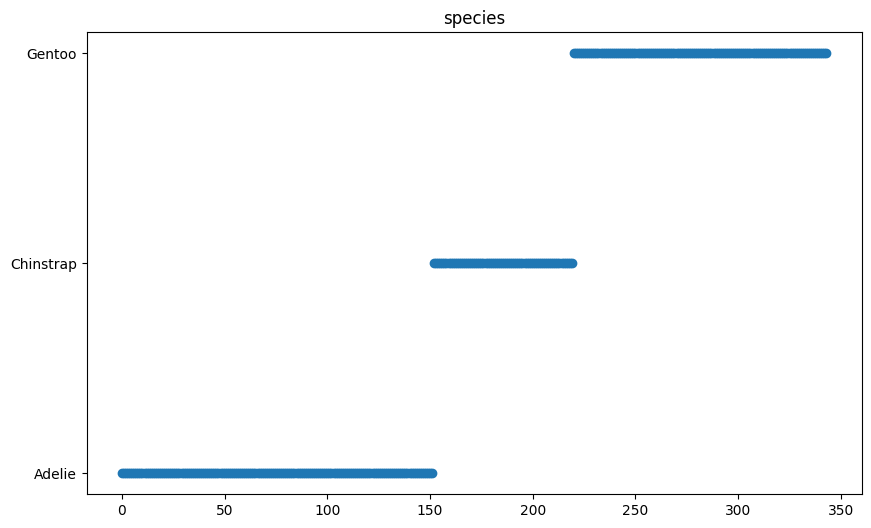

In [4]:
plt.figure(figsize=(10, 6))
plt.scatter(df.index,df['species'])
plt.title('species')
plt.show

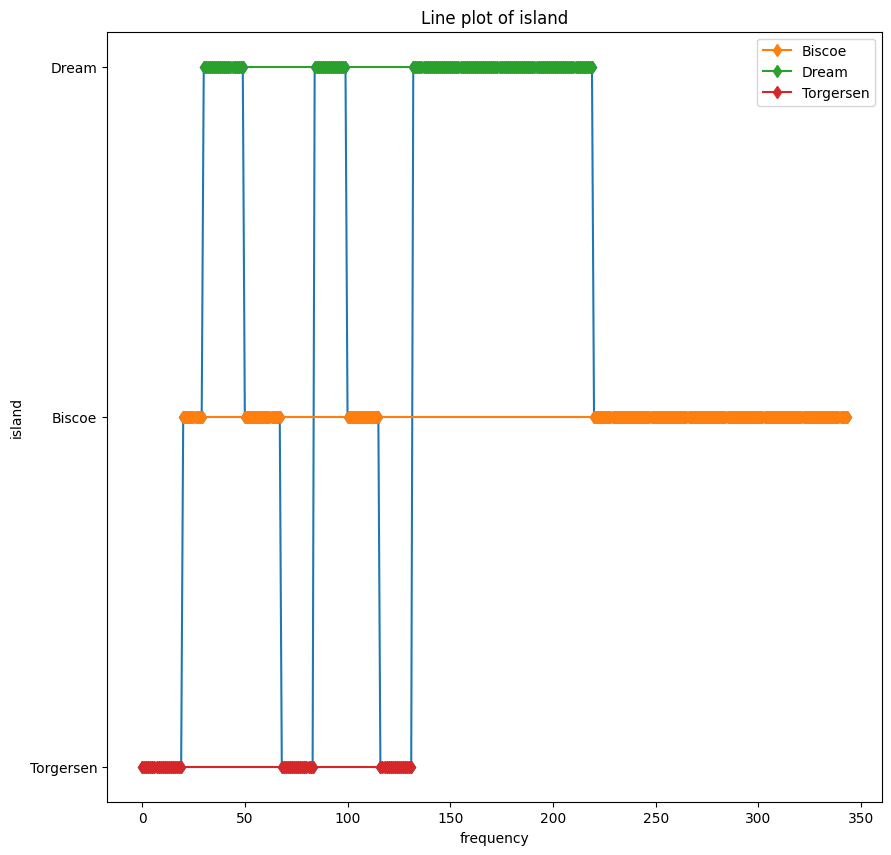

In [5]:
plt.figure(figsize=(10,10))
plt.title('Line plot of island')
plt.xlabel('frequency',fontsize=10)
plt.ylabel('island',fontsize=10)
plt.plot(df.index,df['island'],markevery=1,marker='d')
for name, group in df.groupby('island'):
  plt.plot(group.index, group['island'],label=name,markevery=1,marker='d')
plt.legend()
plt.show()

<Axes: ylabel='culmen_length_mm'>

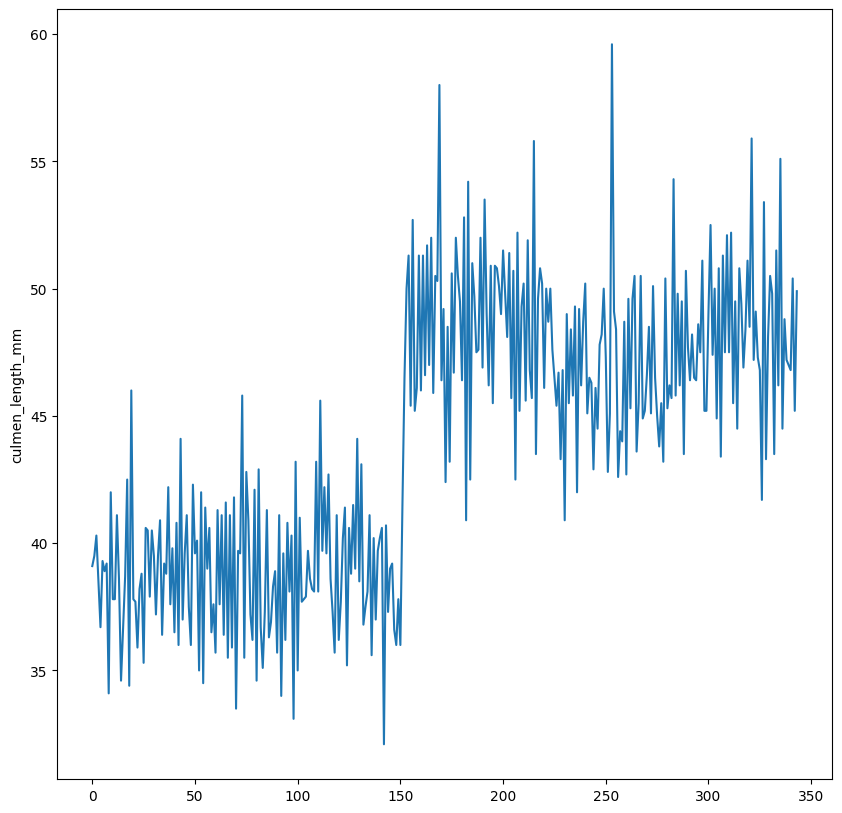

In [6]:
plt.figure(figsize=(10,10))
sns.lineplot(df['culmen_length_mm'])

<function matplotlib.pyplot.show(close=None, block=None)>

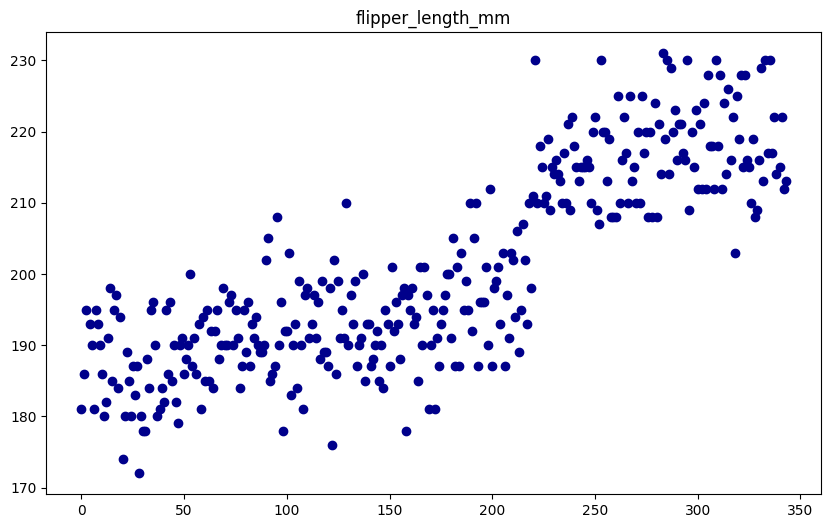

In [7]:
plt.figure(figsize=(10, 6))
plt.scatter(df.index,df['flipper_length_mm'],c="DarkBlue")
plt.title('flipper_length_mm')
plt.show

(array([21., 35., 32., 34., 44., 55., 56., 39., 16., 10.]),
 array([13.1 , 13.94, 14.78, 15.62, 16.46, 17.3 , 18.14, 18.98, 19.82,
        20.66, 21.5 ]),
 <BarContainer object of 10 artists>)

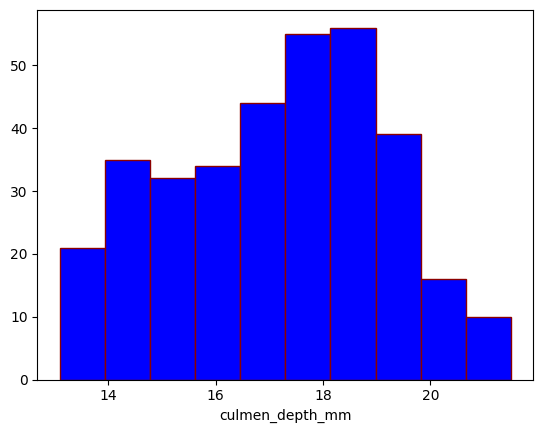

In [8]:
plt.xlabel('culmen_depth_mm')
plt.hist(df['culmen_depth_mm'],edgecolor="DarkRed",color="blue")

<ipython-input-9-e17f91863b56>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['body_mass_g'], shade=True, color='b')


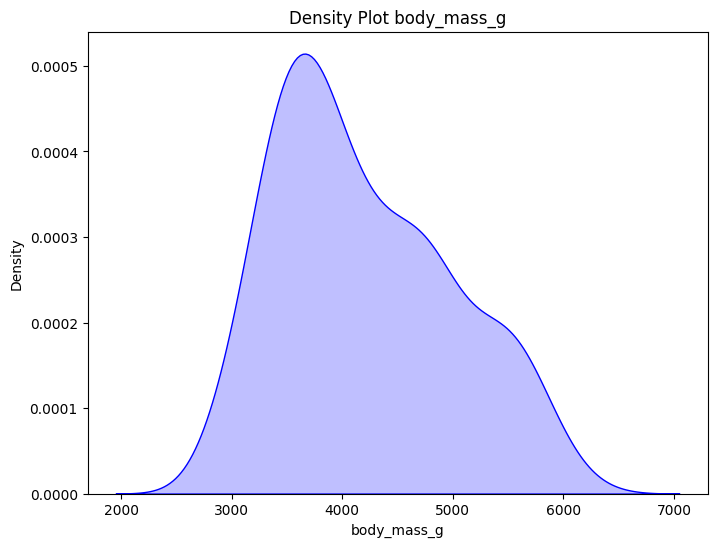

In [9]:
plt.figure(figsize=(8, 6))
sns.kdeplot(df['body_mass_g'], shade=True, color='b')
plt.title('Density Plot body_mass_g')
plt.xlabel('body_mass_g')
plt.ylabel('Density')
plt.show()

<Axes: xlabel='flipper_length_mm'>

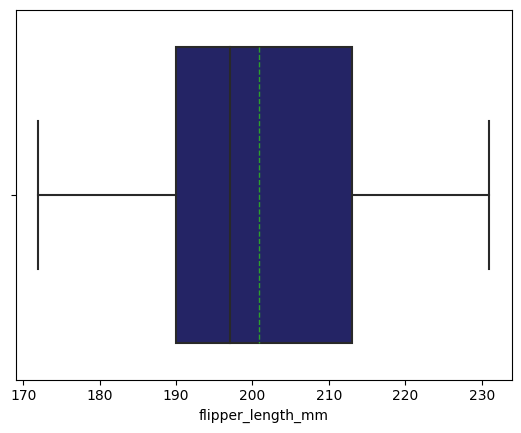

In [10]:
sns.boxplot(x="flipper_length_mm", data=df, whis=5, color='midnightblue', showmeans=True, meanline=True)

<Axes: xlabel='body_mass_g'>

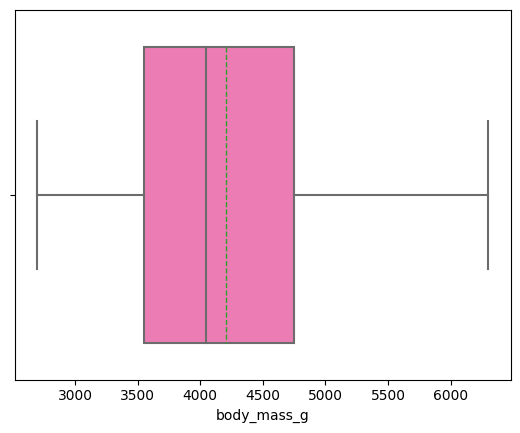

In [11]:
sns.boxplot(x="body_mass_g", data=df, whis=5, color='hotpink', showmeans=True, meanline=True)

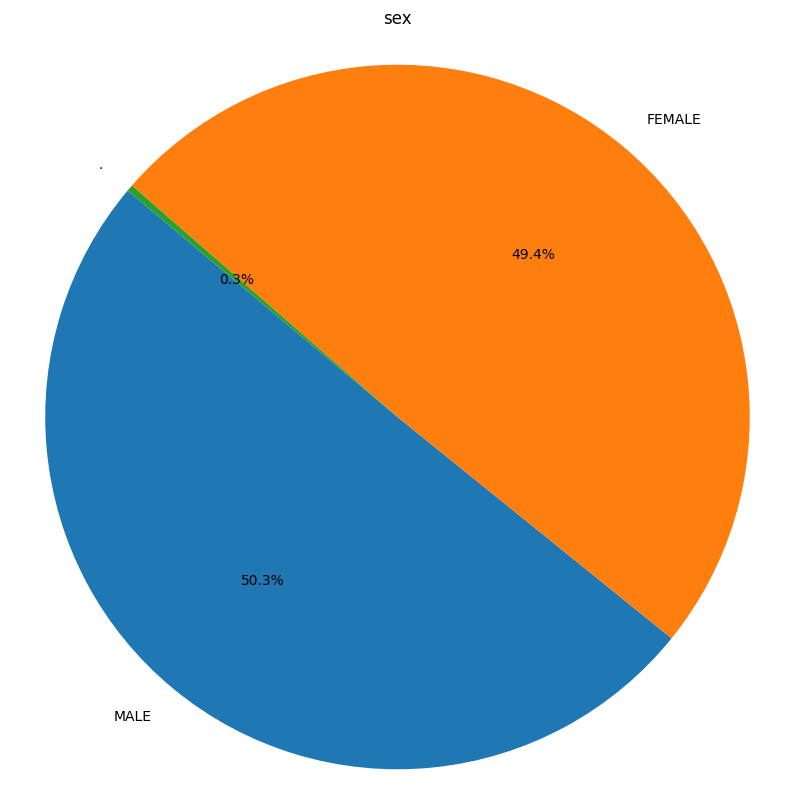

In [12]:
category_counts = df['sex'].value_counts()
plt.figure(figsize=(10,10))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('sex')
plt.show()

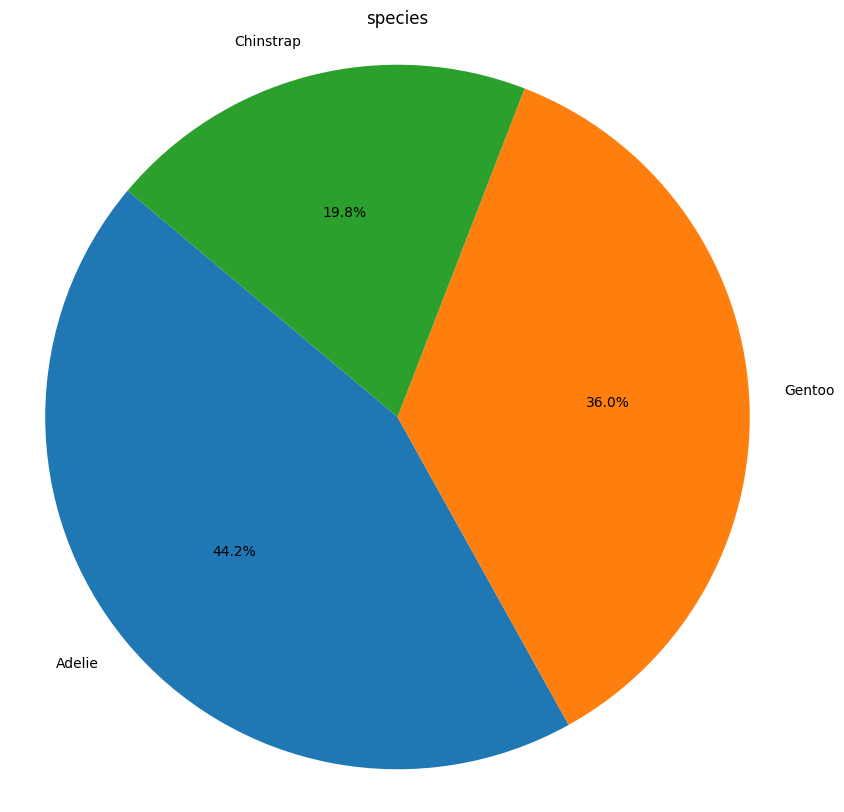

In [13]:
category_counts = df['species'].value_counts()
plt.figure(figsize=(10,10))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('species')
plt.show()

bivariate analysis

<Axes: xlabel='species', ylabel='culmen_length_mm'>

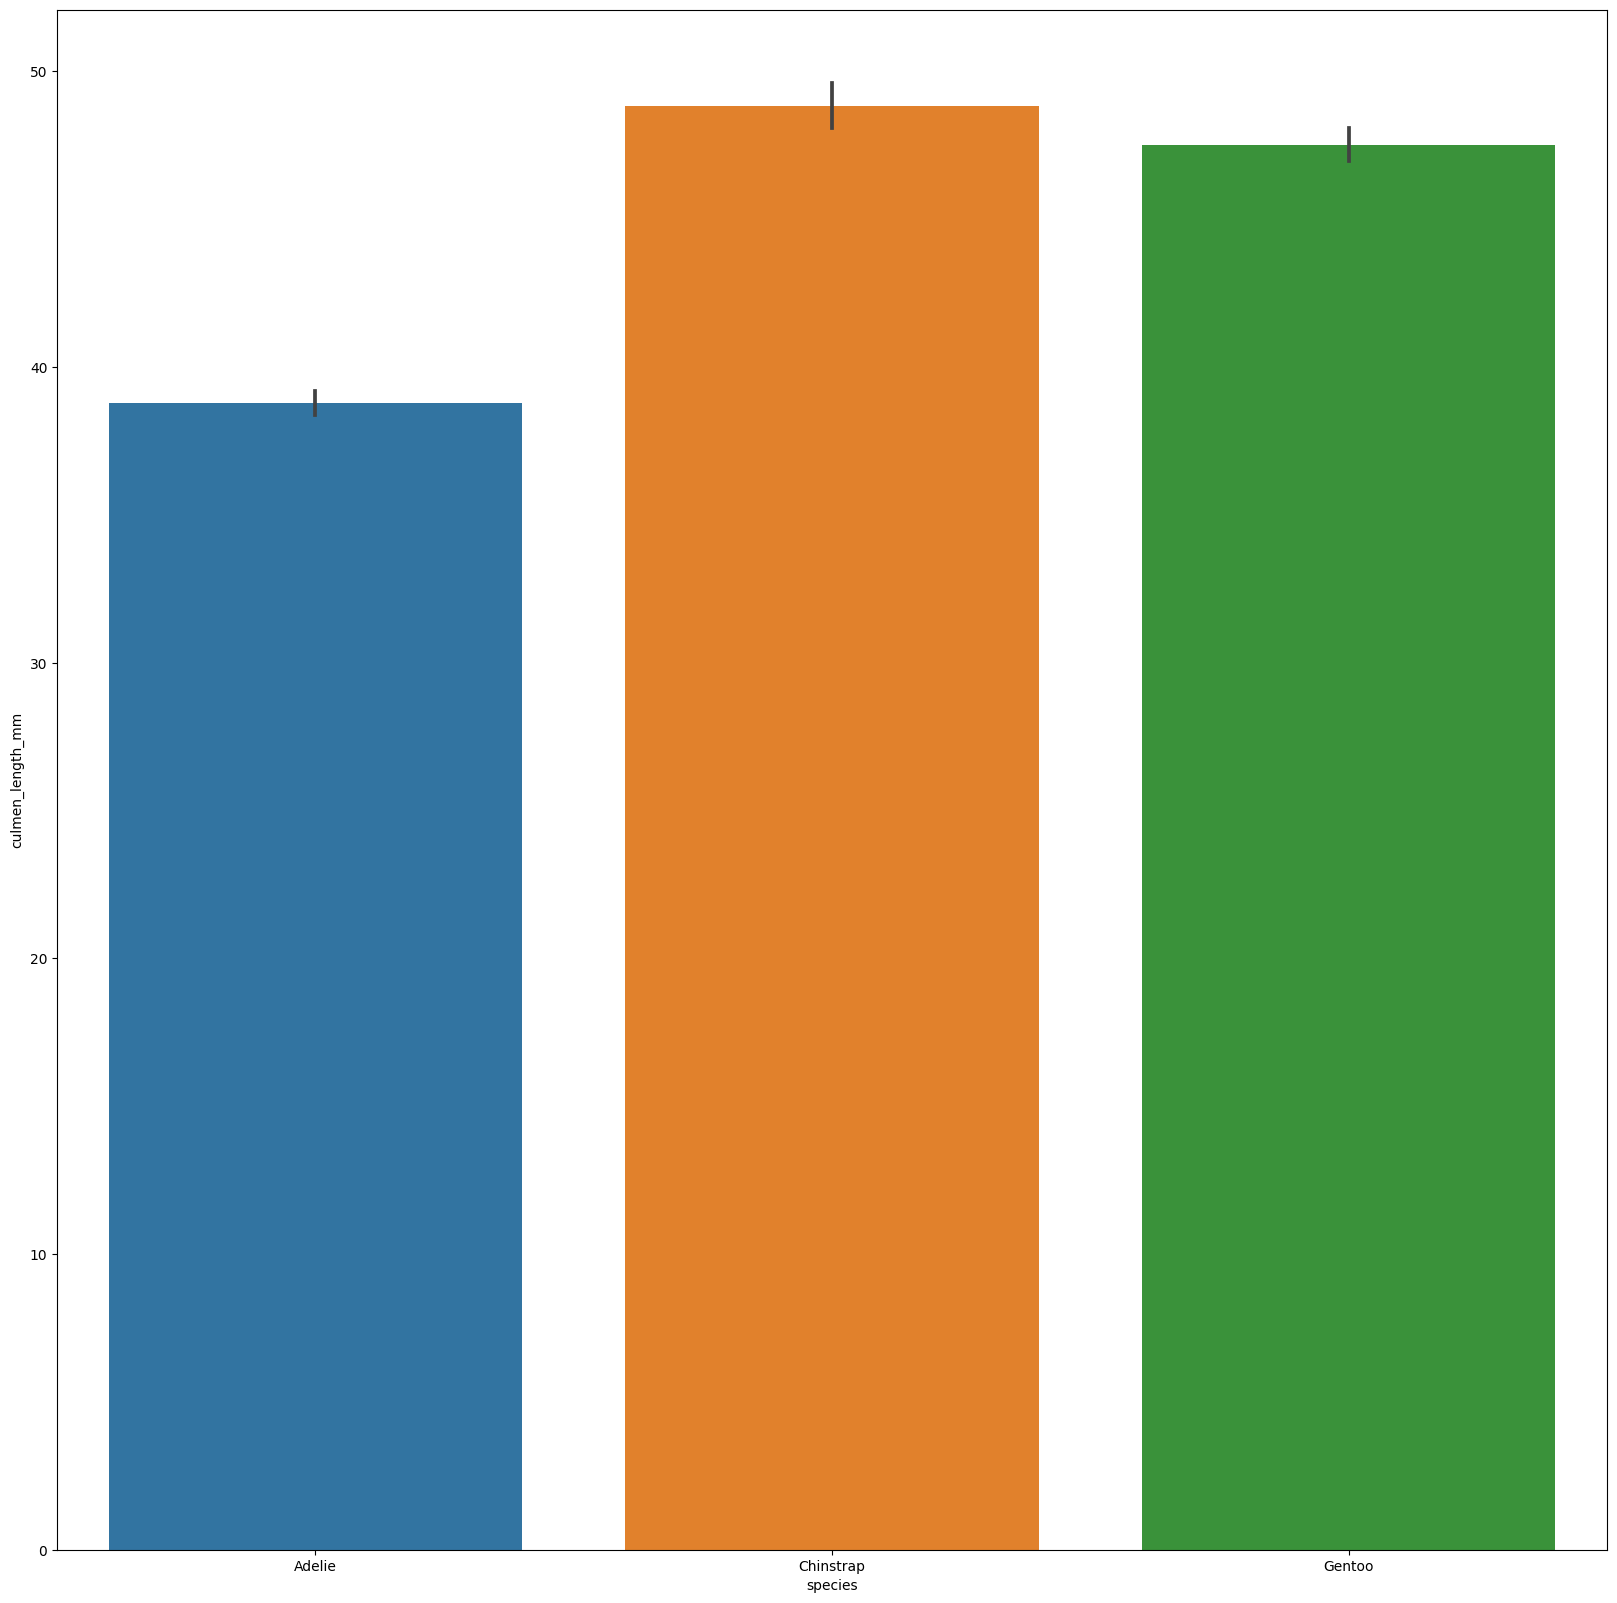

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 20))
sns.barplot(y=df['culmen_length_mm'], x=df['species'])

<Axes: xlabel='species', ylabel='body_mass_g'>

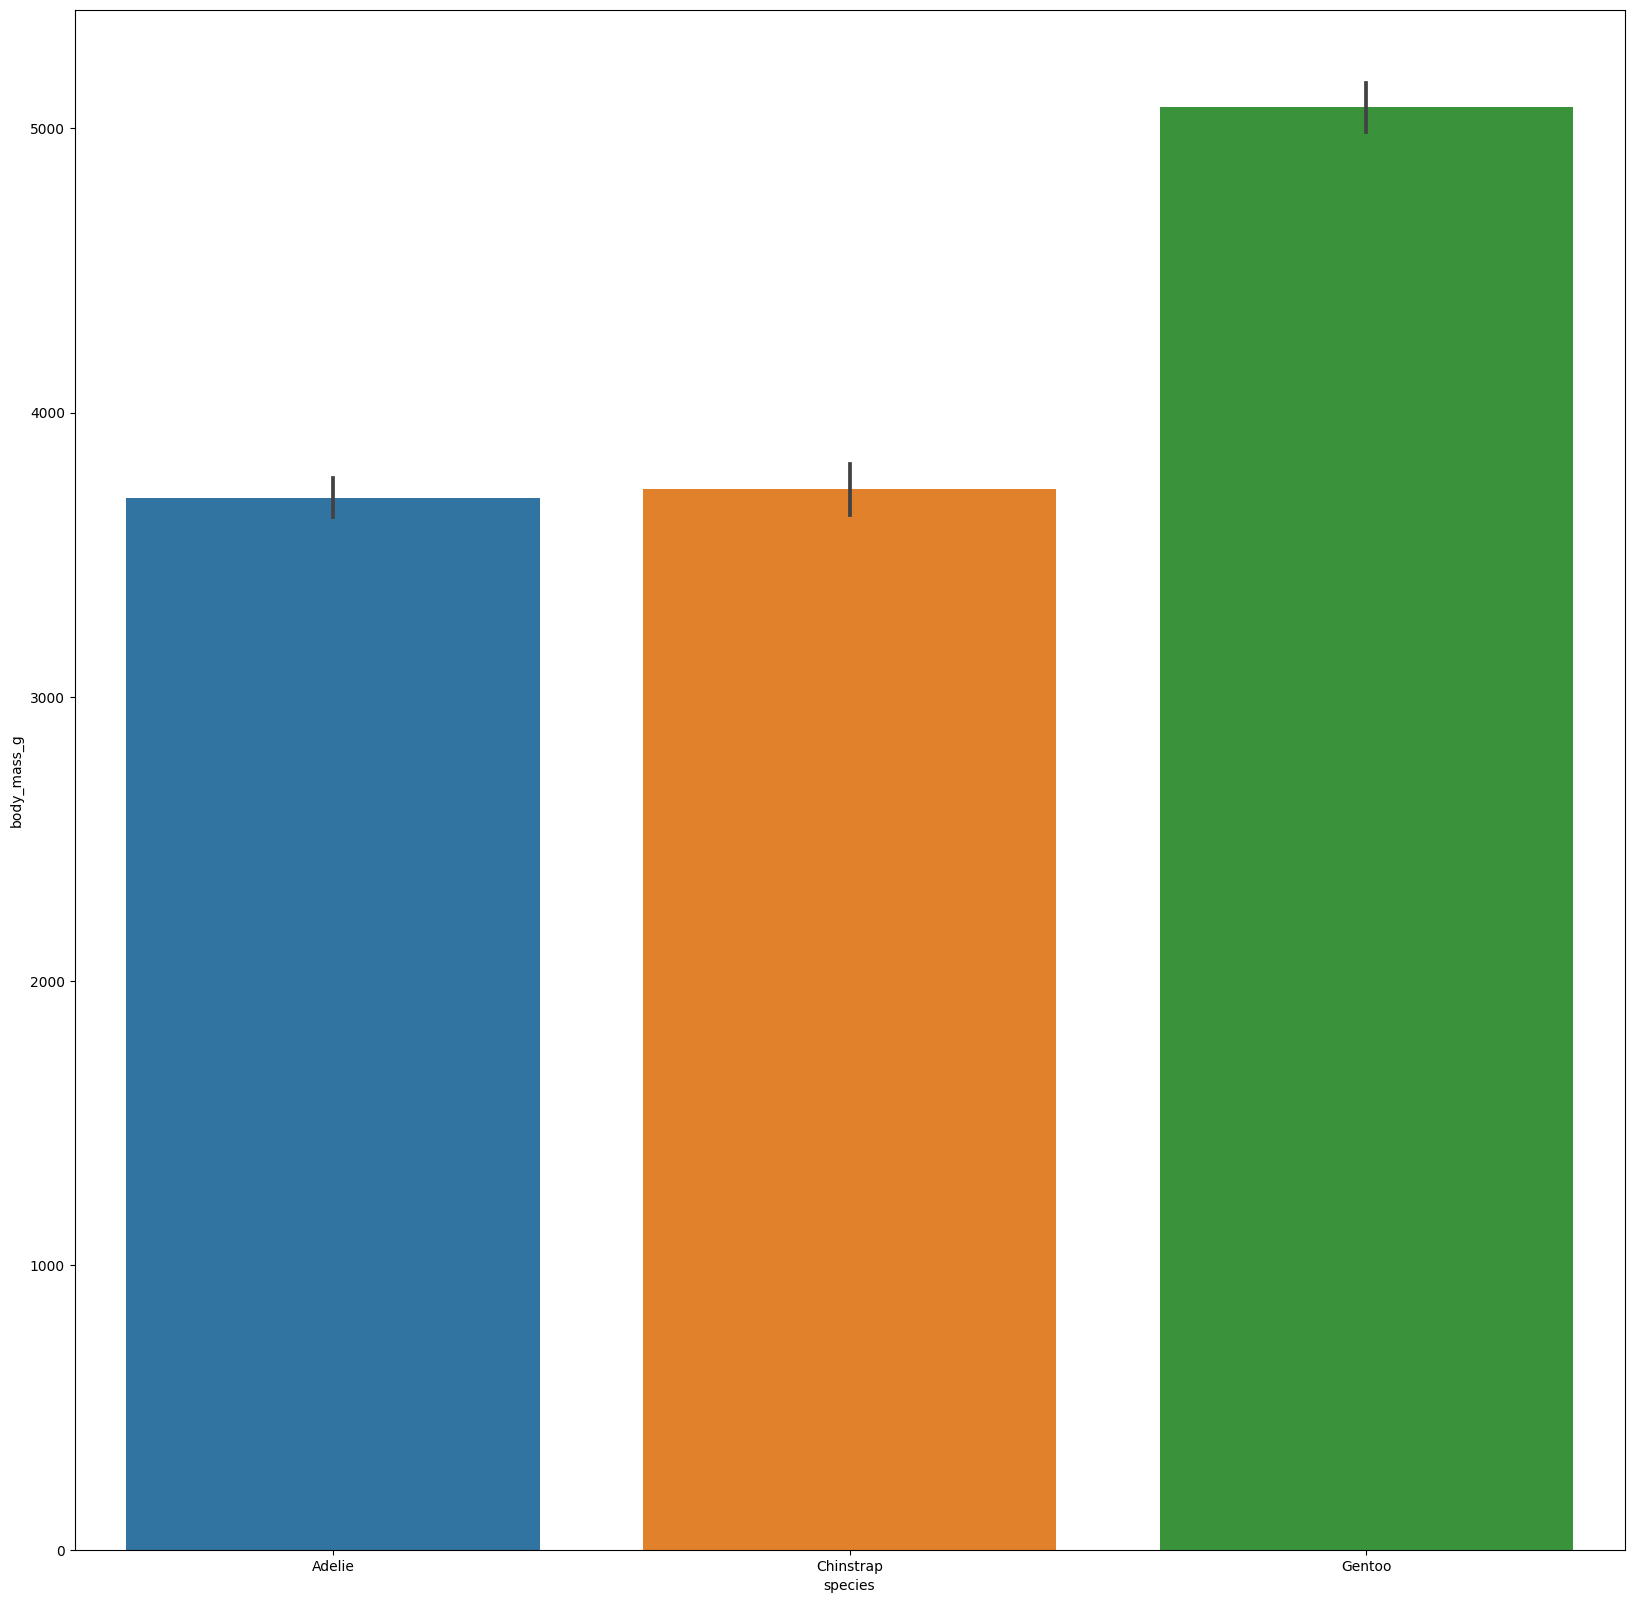

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 20))
sns.barplot(y=df['body_mass_g'], x=df['species'])

<Axes: xlabel='species', ylabel='culmen_depth_mm'>

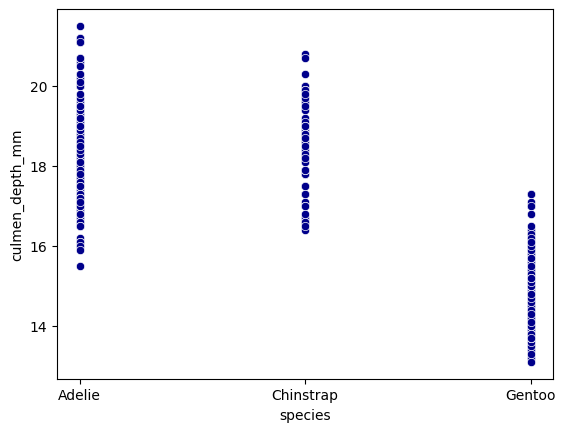

In [16]:
sns.scatterplot(x=df['species'],
                y=df['culmen_depth_mm'],c="DarkBlue")

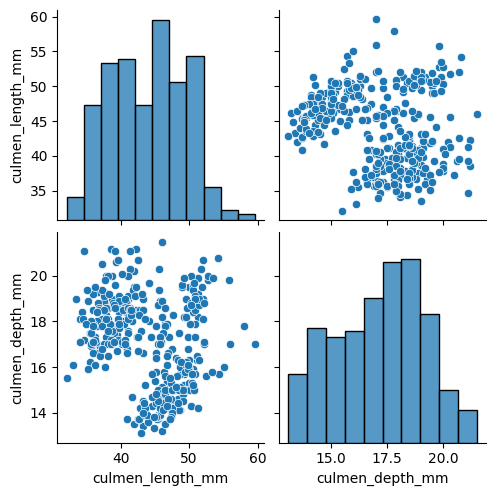

In [17]:
# Pair plot (for multiple variables)
sns.pairplot(df, vars=['culmen_length_mm', 'culmen_depth_mm'])
plt.show()

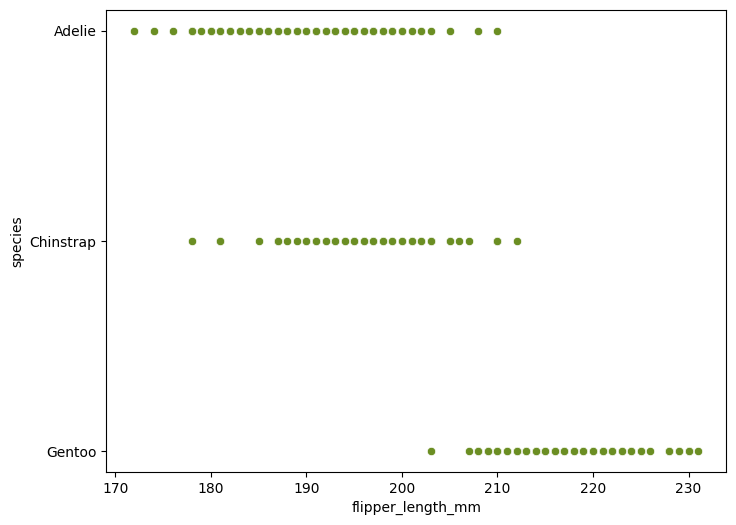

In [18]:
# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='flipper_length_mm', y='species',c='olivedrab')
plt.xlabel('flipper_length_mm')
plt.ylabel('species')
plt.show()

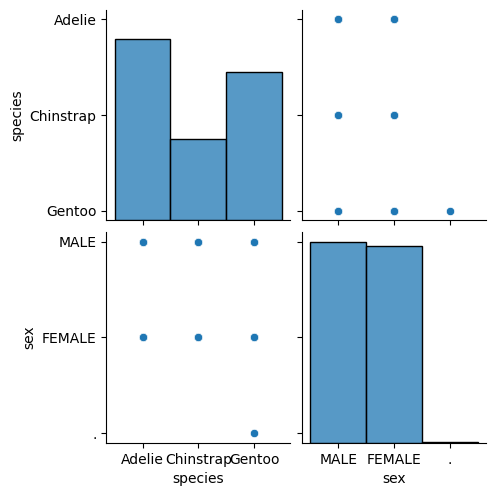

In [19]:
# Pair plot (for multiple variables)
sns.pairplot(df, vars=['species', 'sex'])
plt.show()

multivariate analysis

In [20]:
selected_vars1 = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm']

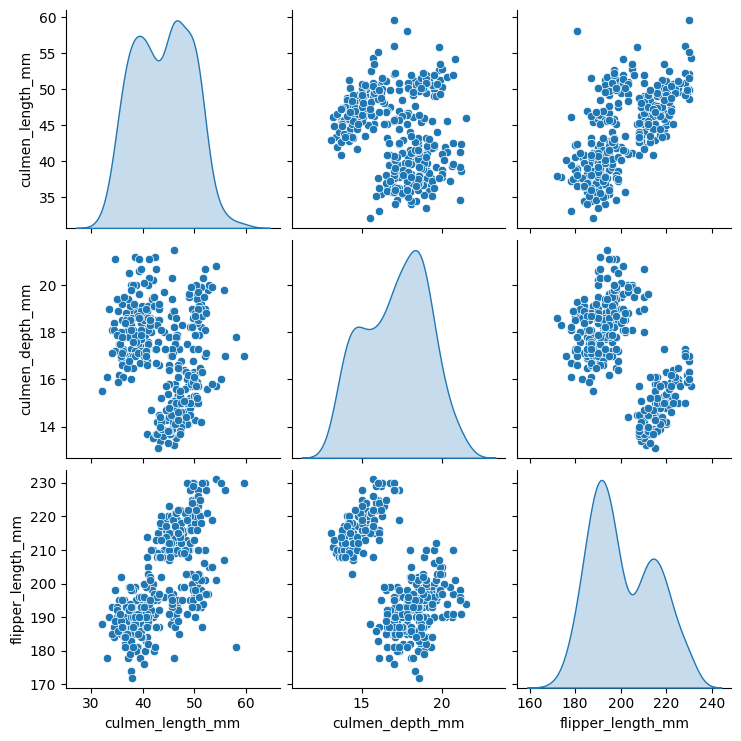

In [39]:
sns.pairplot(df[selected_vars1], diag_kind='kde')
plt.show()

In [21]:
correlation_matrix = df[selected_vars1].corr()

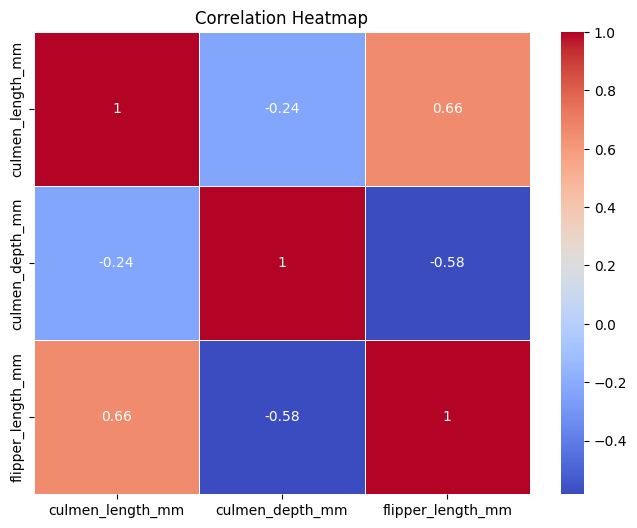

In [22]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

<ipython-input-23-c12aac45c648>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax = sns.heatmap(df.corr(), annot=True, linewidths=.5)


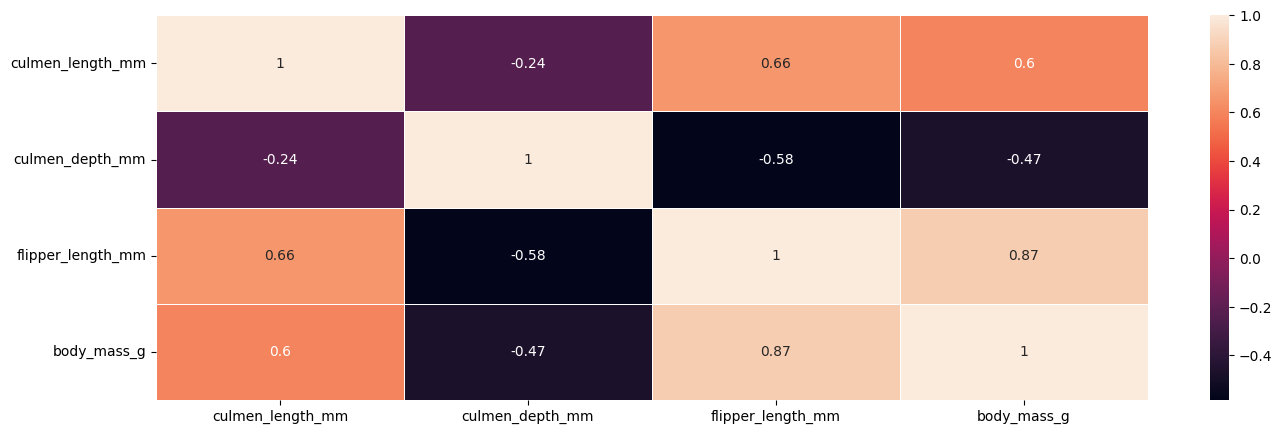

In [23]:
plt.figure(figsize = (16,5))
ax = sns.heatmap(df.corr(), annot=True, linewidths=.5)

discriptive statistics

In [24]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


missing values

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [26]:
df.isnull().any()

species              False
island               False
culmen_length_mm      True
culmen_depth_mm       True
flipper_length_mm     True
body_mass_g           True
sex                   True
dtype: bool

In [27]:
#df = df.dropna(axis=0)
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [57]:
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


handling the missing values in each column

In [28]:
#Replace the missing values for numerical columns with mean
df['culmen_length_mm'] = df['culmen_length_mm'].fillna(df['culmen_length_mm'].mean())

In [29]:
#Replace the missing values for numerical columns with mean
df['culmen_depth_mm'] = df['culmen_depth_mm'].fillna(df['culmen_depth_mm'].mean())

In [30]:
#Replace the missing values for numerical columns with median
df['flipper_length_mm'] = df['flipper_length_mm'].fillna(df['flipper_length_mm'].median())

In [31]:
#Replace the missing values for numerical columns with median
df['body_mass_g'] = df['body_mass_g'].fillna(df['body_mass_g'].median())

In [42]:
# Fill missing values with the mode value
mode_sex = df['sex'].mode().iloc[0]

df['sex'] = df['sex'].fillna(mode_sex)

In [36]:
#Replace the missing values for numerical columns with mode
df['species'] = df['species'].fillna(df['species'].mode())

In [34]:
#Replace the missing values for numerical columns with mode
df['island'] = df['island'].fillna(df['island'].mode())

In [43]:
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10000,18.70000,181.0,3750.0,MALE
1,Adelie,Torgersen,39.50000,17.40000,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.30000,18.00000,195.0,3250.0,FEMALE
3,Adelie,Torgersen,43.92193,17.15117,197.0,4050.0,MALE
4,Adelie,Torgersen,36.70000,19.30000,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,43.92193,17.15117,197.0,4050.0,MALE
340,Gentoo,Biscoe,46.80000,14.30000,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.40000,15.70000,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.20000,14.80000,212.0,5200.0,FEMALE


In [44]:
df.isnull().any()

species              False
island               False
culmen_length_mm     False
culmen_depth_mm      False
flipper_length_mm    False
body_mass_g          False
sex                  False
dtype: bool

In [45]:
df.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

handling outliers

In [46]:
df.describe()[['flipper_length_mm', 'body_mass_g']]

,flipper_length_mm,body_mass_g
count,344.000000,344.000000
mean,200.892442,4200.872093
std,14.023826,799.696532
min,172.000000,2700.000000
25%,190.000000,3550.000000
50%,197.000000,4050.000000
75%,213.000000,4750.000000
max,231.000000,6300.000000


<function matplotlib.pyplot.show(close=None, block=None)>

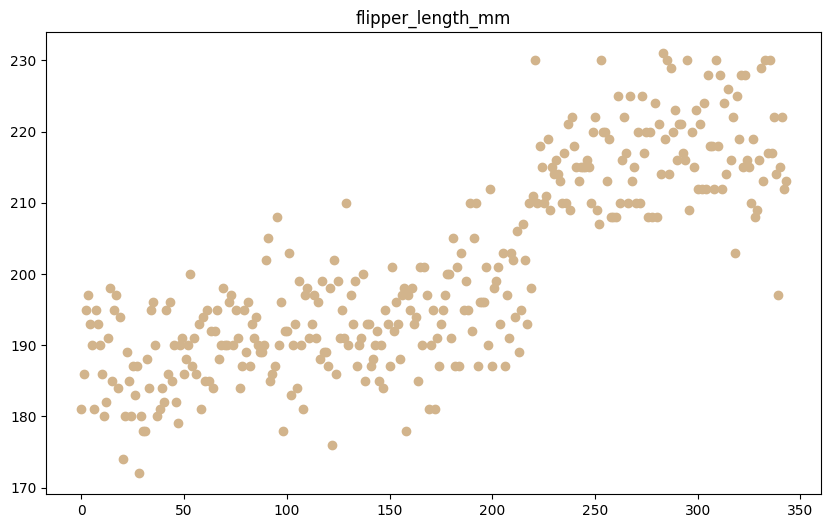

In [47]:
plt.figure(figsize=(10, 6))
plt.scatter(df.index,df['flipper_length_mm'],c="tan")
plt.title('flipper_length_mm')
plt.show

<Axes: xlabel='body_mass_g'>

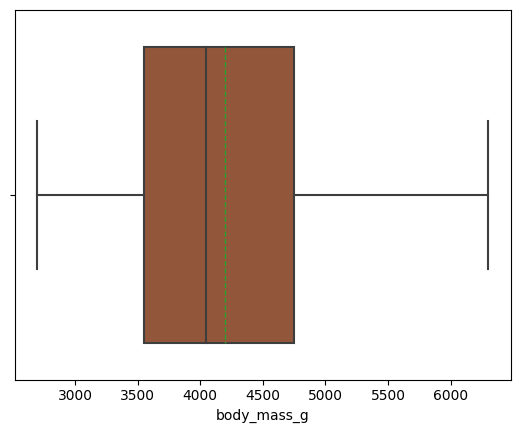

In [48]:
sns.boxplot(x="body_mass_g", data=df, whis=5, color='sienna', showmeans=True, meanline=True)

multivariate outliers

In [49]:
df.flipper_length_mm.mean()

200.8924418604651

In [50]:
df.flipper_length_mm.std()

14.0238260760044

In [51]:
upper_lim=df.flipper_length_mm.mean()+3*df.flipper_length_mm.std()
upper_lim

242.96392008847832

In [52]:
lower_lim=df.flipper_length_mm.mean()-3*df.flipper_length_mm.std()
lower_lim

158.8209636324519

In [53]:
#outliers
df[(df.flipper_length_mm <= lower_lim) | (df.flipper_length_mm >= upper_lim)]


,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex


In [54]:
df[(df.flipper_length_mm >= lower_lim) & (df.flipper_length_mm <= upper_lim)]


,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10000,18.70000,181.0,3750.0,MALE
1,Adelie,Torgersen,39.50000,17.40000,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.30000,18.00000,195.0,3250.0,FEMALE
3,Adelie,Torgersen,43.92193,17.15117,197.0,4050.0,MALE
4,Adelie,Torgersen,36.70000,19.30000,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,43.92193,17.15117,197.0,4050.0,MALE
340,Gentoo,Biscoe,46.80000,14.30000,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.40000,15.70000,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.20000,14.80000,212.0,5200.0,FEMALE


In [58]:
#create a function to find outliers using IQR
q1=df.body_mass_g.quantile(0.25)
q3=df.body_mass_g.quantile(0.75)
IQR=q3-q1
outliers = df[((df.body_mass_g<(q1-1.5*IQR)) | (df.body_mass_g>(q3+1.5*IQR)))]

In [61]:
lower_limit=q1-1.5*IQR
upper_limit=q1+1.5*IQR
df[(df.body_mass_g<=lower_limit) | (df.body_mass_g>=upper_limit)]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
221,Gentoo,Biscoe,50.0,16.3,230.0,5700.0,MALE
223,Gentoo,Biscoe,50.0,15.2,218.0,5700.0,MALE
224,Gentoo,Biscoe,47.6,14.5,215.0,5400.0,MALE
231,Gentoo,Biscoe,49.0,16.1,216.0,5550.0,MALE
233,Gentoo,Biscoe,48.4,14.6,213.0,5850.0,MALE
235,Gentoo,Biscoe,49.3,15.7,217.0,5850.0,MALE
237,Gentoo,Biscoe,49.2,15.2,221.0,6300.0,MALE
239,Gentoo,Biscoe,48.7,15.1,222.0,5350.0,MALE
240,Gentoo,Biscoe,50.2,14.3,218.0,5700.0,MALE
247,Gentoo,Biscoe,47.8,15.0,215.0,5650.0,MALE


In [60]:
df[(df.body_mass_g>=lower_limit) & (df.body_mass_g<=upper_limit)]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10000,18.70000,181.0,3750.0,MALE
1,Adelie,Torgersen,39.50000,17.40000,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.30000,18.00000,195.0,3250.0,FEMALE
3,Adelie,Torgersen,43.92193,17.15117,197.0,4050.0,MALE
4,Adelie,Torgersen,36.70000,19.30000,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
336,Gentoo,Biscoe,44.50000,15.70000,217.0,4875.0,.
338,Gentoo,Biscoe,47.20000,13.70000,214.0,4925.0,FEMALE
339,Gentoo,Biscoe,43.92193,17.15117,197.0,4050.0,MALE
340,Gentoo,Biscoe,46.80000,14.30000,215.0,4850.0,FEMALE


In [62]:
df.body_mass_g.sample()

123    3875.0
Name: body_mass_g, dtype: float64

In [63]:
df.flipper_length_mm.sample()

45    190.0
Name: flipper_length_mm, dtype: float64

correlation between independent variables and target

In [67]:
c = np.corrcoef(df['culmen_length_mm'],df['species'])
print('Correlations between culmen_length_mm and species\n',c)

Correlations between culmen_length_mm and species
 [[1.         0.72867442]
 [0.72867442 1.        ]]


In [68]:
c = np.corrcoef(df['culmen_depth_mm'],df['species'])
print('Correlations between culmen_depth_mm and species\n',c)

Correlations between culmen_depth_mm and species
 [[ 1.         -0.74133464]
 [-0.74133464  1.        ]]


In [69]:
c = np.corrcoef(df['flipper_length_mm'],df['species'])
print('Correlations between flipper_length_mm and species\n',c)

Correlations between flipper_length_mm and species
 [[1.         0.85081909]
 [0.85081909 1.        ]]


In [70]:
c = np.corrcoef(df['body_mass_g'],df['species'])
print('Correlations between body_mass_g and species\n',c)

Correlations between body_mass_g and species
 [[1.         0.74754707]
 [0.74754707 1.        ]]


In [71]:
c = np.corrcoef(df['island'],df['species'])
print('Correlations between island and species\n',c)

Correlations between island and species
 [[ 1.         -0.63565902]
 [-0.63565902  1.        ]]


In [72]:
c = np.corrcoef(df['sex'],df['species'])
print('Correlations between sex and species\n',c)

Correlations between sex and species
 [[ 1.         -0.00382257]
 [-0.00382257  1.        ]]


check for categorical columns and performing encoding

label encoding

In [64]:
label_encoder = preprocessing.LabelEncoder()

df.loc[:, 'species'] = label_encoder.fit_transform(df['species'])

<ipython-input-64-26b8d202c53c>:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'species'] = label_encoder.fit_transform(df['species'])


In [65]:
label_encoder = preprocessing.LabelEncoder()

df.loc[:, 'island'] = label_encoder.fit_transform(df['island'])

<ipython-input-65-45fc3e22c869>:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'island'] = label_encoder.fit_transform(df['island'])


In [66]:
label_encoder = preprocessing.LabelEncoder()

df.loc[:, 'sex'] = label_encoder.fit_transform(df['sex'])

<ipython-input-66-208927c99c16>:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'sex'] = label_encoder.fit_transform(df['sex'])


In [73]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,39.10000,18.70000,181.0,3750.0,2
1,0,2,39.50000,17.40000,186.0,3800.0,1
2,0,2,40.30000,18.00000,195.0,3250.0,1
3,0,2,43.92193,17.15117,197.0,4050.0,2
4,0,2,36.70000,19.30000,193.0,3450.0,1


In [74]:
df.tail()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
339,2,0,43.92193,17.15117,197.0,4050.0,2
340,2,0,46.80000,14.30000,215.0,4850.0,1
341,2,0,50.40000,15.70000,222.0,5750.0,2
342,2,0,45.20000,14.80000,212.0,5200.0,1
343,2,0,49.90000,16.10000,213.0,5400.0,2


splitting the data into dependent and independent variables

In [75]:
y = df['species']

X = df.drop(columns=['species'])

scaling the dataset

In [80]:
trans = StandardScaler()
X_train = trans.fit_transform(X_train)
X_test=trans.fit_transform(X_test)
X_train
X_test

array([[-9.55317528e-01,  7.42614074e-01, -1.66691287e+00,
         8.54821502e-01,  8.76255124e-01, -9.85610761e-01],
       [-9.55317528e-01,  1.07549018e+00, -7.41775431e-01,
         1.21185954e+00,  2.09801810e+00,  1.01459931e+00],
       [ 1.62965931e+00, -7.92314620e-01,  1.38059869e+00,
        -3.59107822e-01,  6.25637078e-01,  1.01459931e+00],
       [ 3.37170892e-01, -4.40945401e-01,  1.05407960e+00,
        -1.28740672e+00, -9.40725708e-01,  1.01459931e+00],
       [-9.55317528e-01,  1.40836628e+00, -3.06416637e-01,
         1.78312040e+00,  1.34616396e+00,  1.01459931e+00],
       [ 3.37170892e-01, -3.66972933e-01,  7.81980349e-01,
         6.93378216e-02, -2.20198827e-01,  1.01459931e+00],
       [ 1.62965931e+00, -1.34710812e+00,  7.45223082e-02,
        -9.30368680e-01, -1.28532552e+00, -9.85610761e-01],
       [-9.55317528e-01,  7.61107191e-01, -1.39481362e+00,
         1.06904432e+00,  1.53412749e+00,  1.01459931e+00],
       [-9.55317528e-01,  1.35288693e+00,  1.289

In [79]:
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,39.10000,18.70000,181.0,3750.0,2
1,0,2,39.50000,17.40000,186.0,3800.0,1
2,0,2,40.30000,18.00000,195.0,3250.0,1
3,0,2,43.92193,17.15117,197.0,4050.0,2
4,0,2,36.70000,19.30000,193.0,3450.0,1
...,...,...,...,...,...,...,...
339,2,0,43.92193,17.15117,197.0,4050.0,2
340,2,0,46.80000,14.30000,215.0,4850.0,1
341,2,0,50.40000,15.70000,222.0,5750.0,2
342,2,0,45.20000,14.80000,212.0,5200.0,1


splitting the data into testing and training

In [76]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=100)

training and testing data shape

In [77]:
print("X_train : ",X_train.shape)
print("X_test : ",X_test.shape)
print("y_train : ",y_train.shape)
print("y_test : ",y_test.shape)

X_train :  (275, 6)
X_test :  (69, 6)
y_train :  (275,)
y_test :  (69,)
